In [13]:
# -*- coding: utf-8 -*-
#  Copyright 2024 United Kingdom Research and Innovation
#  Copyright 2024 The University of Manchester
#  Copyright 2024 Technical University of Denmark
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Hannah Robarts (STFC-UKRI)

# Load and visualise data with ZeissDataReader
This how-to shows how to use the `ZeissDataReader` to load data from Zeiss .txrm files and quickly visualise the data and geometry

Get the example dataset `dataexample.WALNUT` using `download_data()`.

In [14]:
from cil.utilities import dataexample
dataexample.WALNUT.download_data(data_dir='../data', prompt=False)

Title: HDTomo TXRM micro-CT datasets
Keywords: X-ray, CT, computed tomography, projection, reconstruction
Publication date: 2021-05-27
DOI: 10.5281/zenodo.4822516
Total size: 6.4 GB

Link: https://zenodo.org/records/4822516/files/walnut.zip   size: 6.4 GB

Checksum is correct. (92e455d5dfa3ac8eeb89a37bedd4cf23)
All files have been downloaded.


True

Now load a file from the dataset using the `ZEISSDataReader()`

We specify the file to load using `file_name = '.walnut/valnut/valnut_2014-03-21_643_28/tomo-A/valnut_tomo-A.txrm"`

In [15]:
from cil.io import ZEISSDataReader
file_name = "../data/walnut/valnut/valnut_2014-03-21_643_28/tomo-A/valnut_tomo-A.txrm"
data_reader = ZEISSDataReader(file_name=file_name)
data = data_reader.read()

View the geometry with `show_geometry` to display information about the source and detector setup


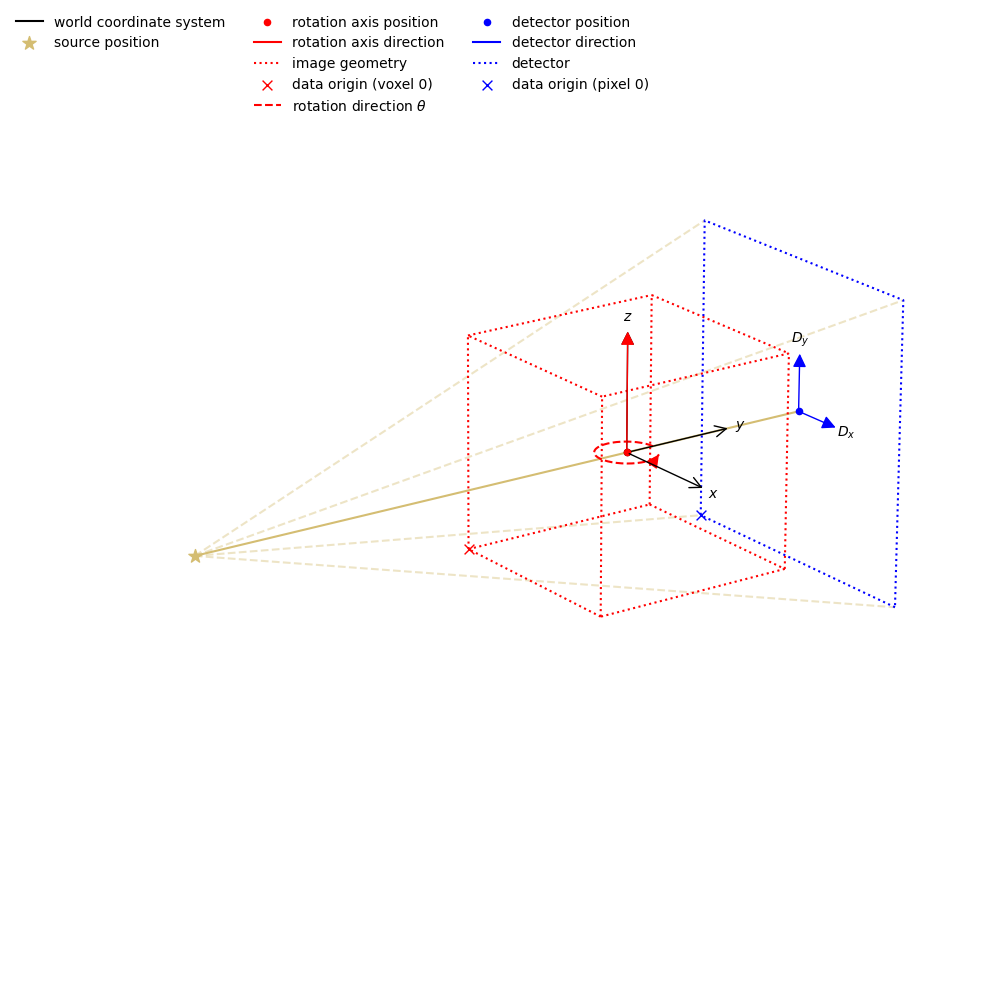

In [16]:
from cil.utilities.display import show_geometry
show_geometry(data.geometry)

View the data with `show2D`

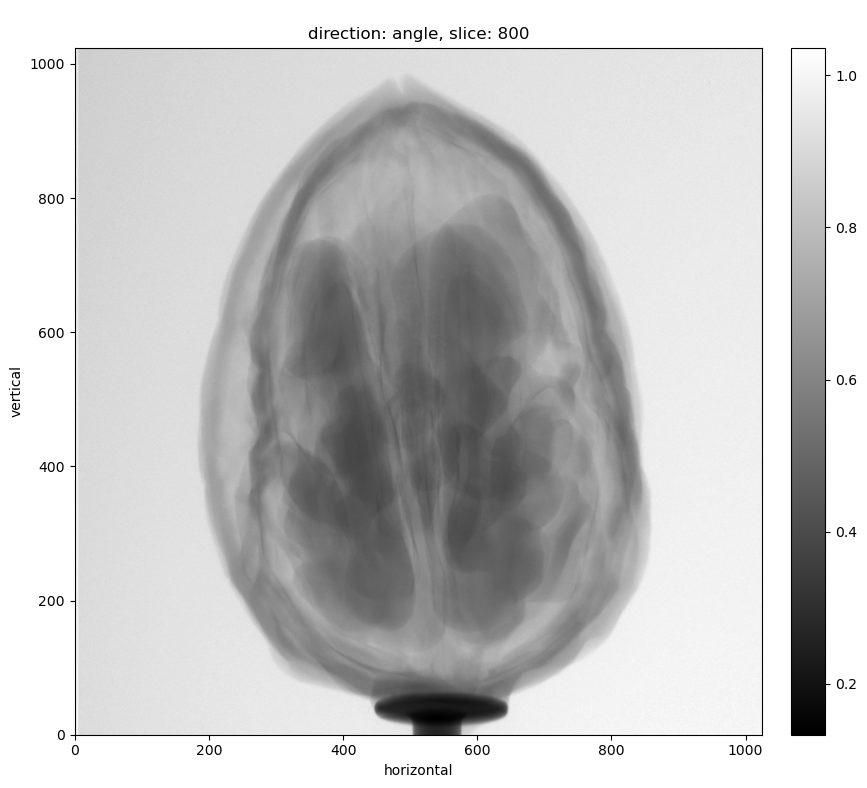

In [17]:
from cil.utilities.display import show2D
show2D(data)

Use the `roi` argument to load a subset of the data. `roi`should be passed as a dictionary e.g. `{'axis_labels_1': (start, end, step),'axis_labels_2': (start, end, step)}` with axis labels that describe the data dimension labels

To load a cropped subset of the data, change the start and end values. 'axis_label': -1 is a shortcut to load all elements along the axis.

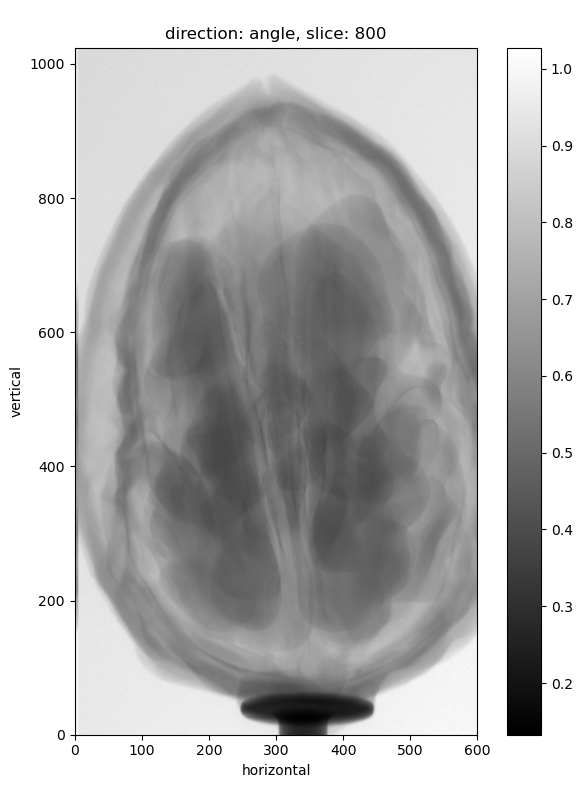

In [18]:
roi = {'horizontal':(200, 800, 1), 'vertical':-1}
data_reader = ZEISSDataReader(file_name=file_name, roi=roi)
data = data_reader.read()
show2D(data)

To load a binned subset of the data, change the step value. Here we use different binning for the horizontal and vertical dimensions which results in a different aspect ratio

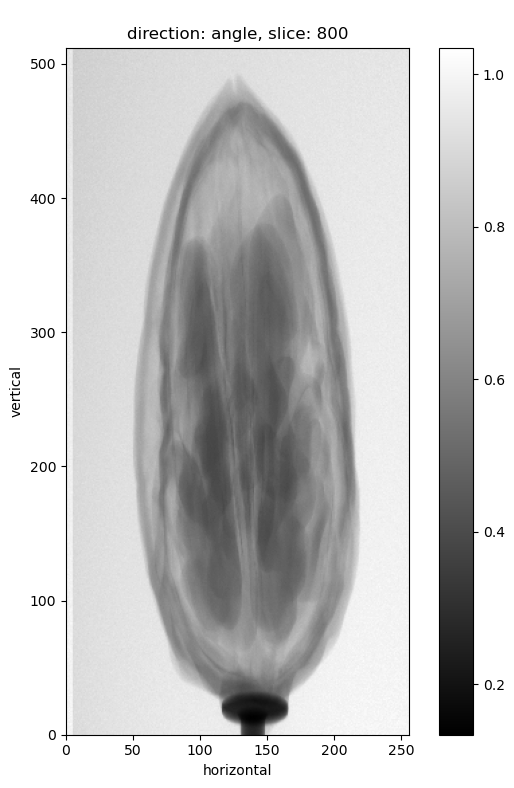

In [19]:
roi = {'horizontal':(None, None, 4), 'vertical':(None, None, 2)}
data_reader = ZEISSDataReader(file_name=file_name, roi=roi)
data = data_reader.read()
show2D(data)

Sometimes we might want to just read the geometry from a Zeiss file, for example if we want to load the raw TIFF files separately but get the correct geometry from the .txrm file. We can do this by instantiating the data reader and using the `get_geometry()` method

In [20]:
data_reader = ZEISSDataReader(file_name=file_name)
ag = data_reader.get_geometry()

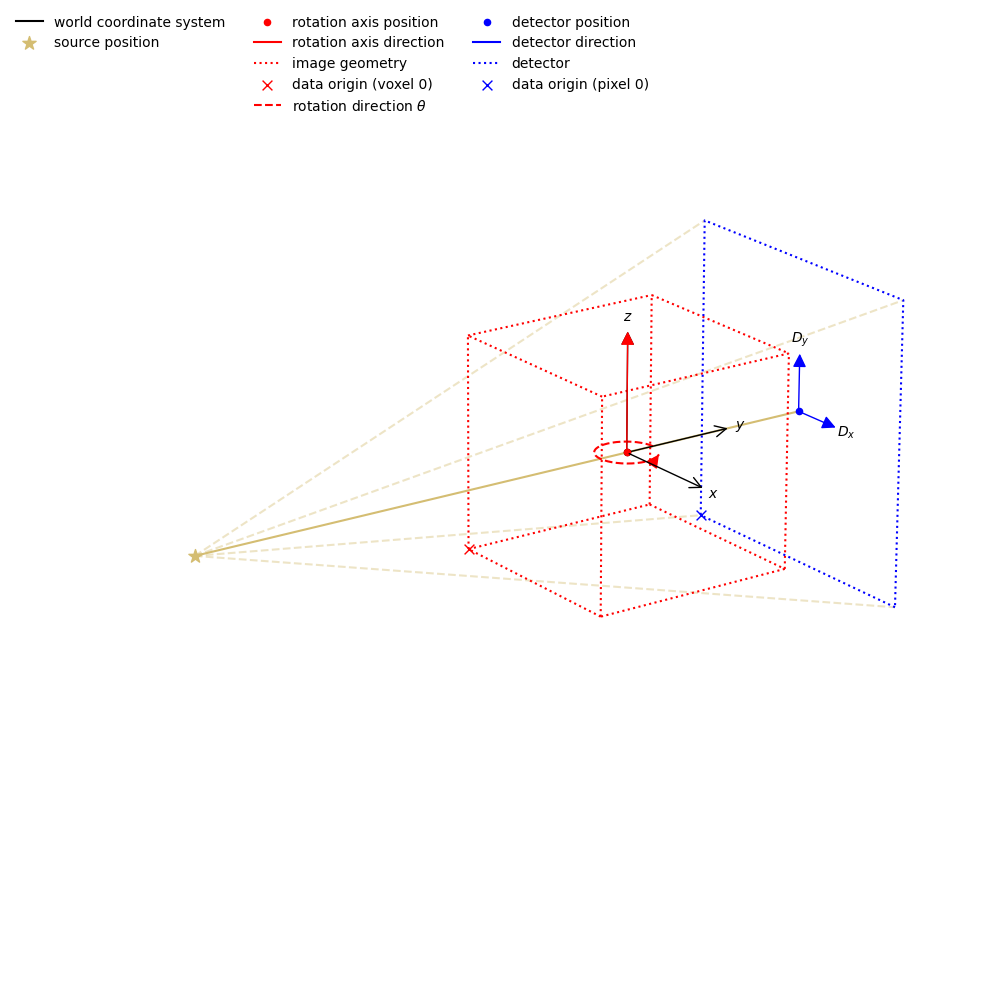

In [21]:
show_geometry(ag)

Uncomment the cell below to delete the dataset and its folder

In [22]:
# import shutil
# shutil.rmtree('../data/walnut')